In [1]:
import scvelo as scv
import numpy as np  
import matplotlib.pyplot as plt

import anndata

import sys
sys.path.append("..")


import cellpath as cp
import cellpath.visual as visual
import cellpath.benchmark as bmk 
import cellpath.de_analy as de


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.kernel_ridge import KernelRidge

import statsmodels.api as sm

# CellPath core

In [5]:
# pre-clustered dataseet
adata = anndata.read_h5ad("../data/real/Pancreas/pe_clust.h5ad")
# adata.obs = adata.obs.drop(labels = ["groups"], axis = 1)

In [22]:
# adata.var.index = [str(x)[2:-1] for x in adata.var.index.values]
# adata.obs.index = [str(x)[2:-1] for x in adata.obs.index.values]
# adata.obs["clusters"] = [str(x)[2:-1] for x in adata.obs["clusters"].values]
# # adata.var["highly_variable_genes"] = [str(x)[2:-1] for x in adata.obs["highly_variable_genes"].values]
# adata.obs["clusters_coarse"] = [str(x)[2:-1] for x in adata.obs["clusters_coarse"].values]
# adata.obs = adata.obs.drop(["groups"], axis = "columns")

In [6]:
cellpath_obj = cp.CellPath(adata = adata)
cellpath_obj.meta_cell_construction(flavor = "k-means", n_clusters = 300, seed = 0)
cellpath_obj.meta_cell_graph(k_neighs = 10, pruning = True)
cellpath_obj.meta_paths_finding(threshold = 0.5, cutoff_length = None, length_bias = 0.5, max_trajs = 30)
# cellpath_obj.paths[cellpath_obj.greedy_order[0]] = cellpath_obj.paths[cellpath_obj.greedy_order[0]][:16]
cellpath_obj.first_order_pt(num_trajs = None,  prop_insert = 0.000)

Already conducted clustering
Meta-cell constructed, number of meta-cells: 300
Meta-cell level neighborhood graph constructed
conduct quality control
selected path (starting_ending):
start_end:  295_69 , len:  37 newly covered: 37
start_end:  290_66 , len:  29 newly covered: 12
start_end:  295_32 , len:  34 newly covered: 8
start_end:  295_275 , len:  35 newly covered: 6
start_end:  295_80 , len:  35 newly covered: 3
start_end:  295_78 , len:  36 newly covered: 2
start_end:  295_4 , len:  34 newly covered: 3
start_end:  268_179 , len:  13 newly covered: 13
start_end:  295_280 , len:  35 newly covered: 2
start_end:  295_181 , len:  37 newly covered: 1
start_end:  295_235 , len:  33 newly covered: 3
start_end:  295_108 , len:  36 newly covered: 1
start_end:  295_202 , len:  31 newly covered: 3
start_end:  295_74 , len:  33 newly covered: 2
start_end:  295_279 , len:  33 newly covered: 2
Finished
Cell-level pseudo-time inferred


# Visualization

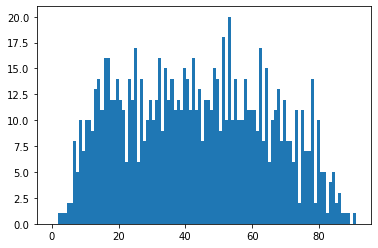

In [5]:
visual.weight_histogram(cellpath_obj, resolution = 100)

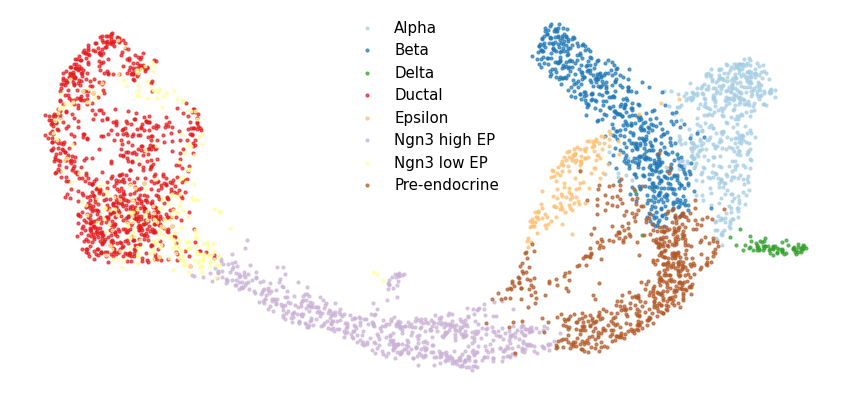

In [6]:
visual.plot_data(cellpath_obj, basis = "umap", figsize = (15,7), save_as = None, axis = False, colormap = "Paired", legend_pos = "upper center")

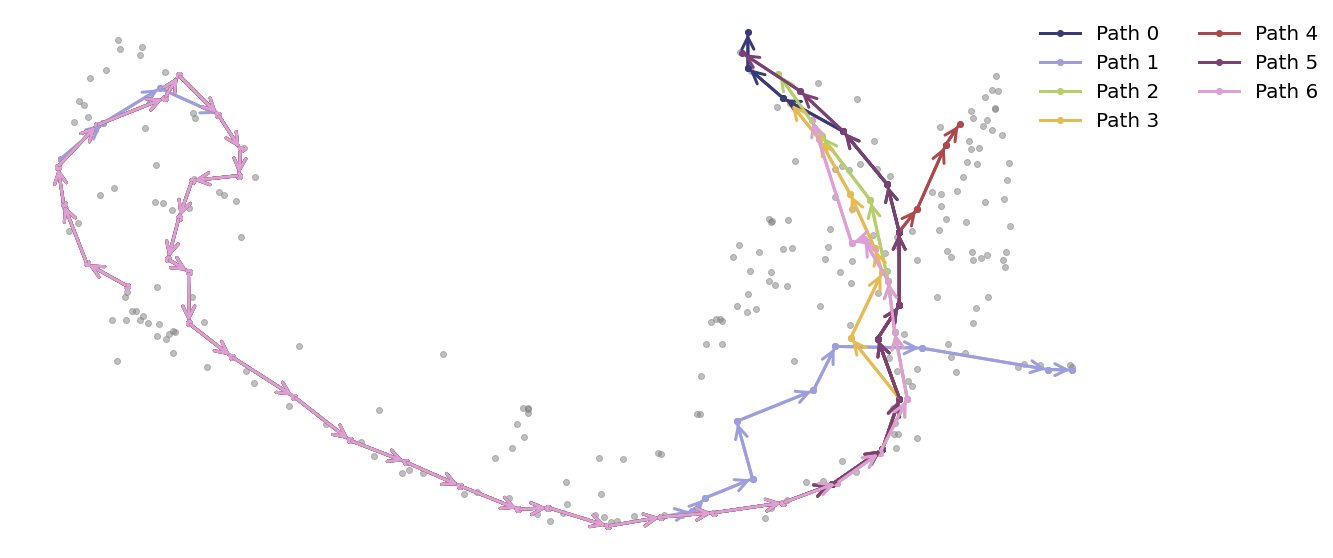

In [7]:
visual.meta_traj_visual(cellpath_obj, basis = "umap", trajs = 7, figsize = (20,10), save_as = None, colormap = "tab20b", axis = False, legend_pos = "upper center")

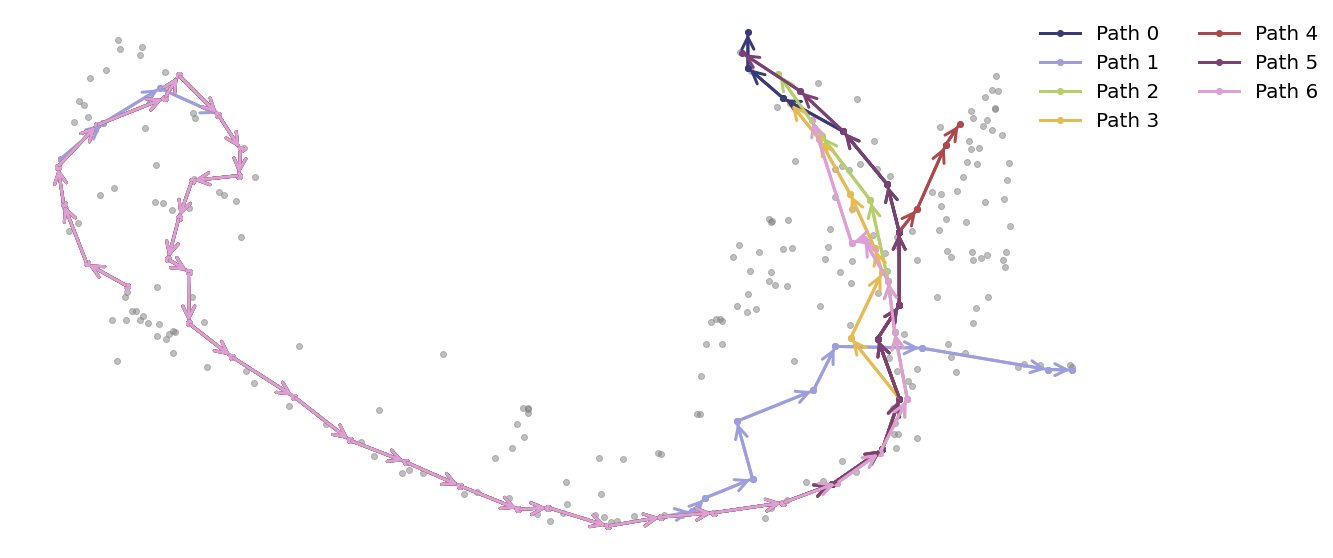

In [12]:
visual.meta_traj_visual(cellpath_obj, basis = "umap", trajs = 7, figsize = (20,10), save_as = None, colormap = "tab20b", axis = False, legend_pos = "upper center")

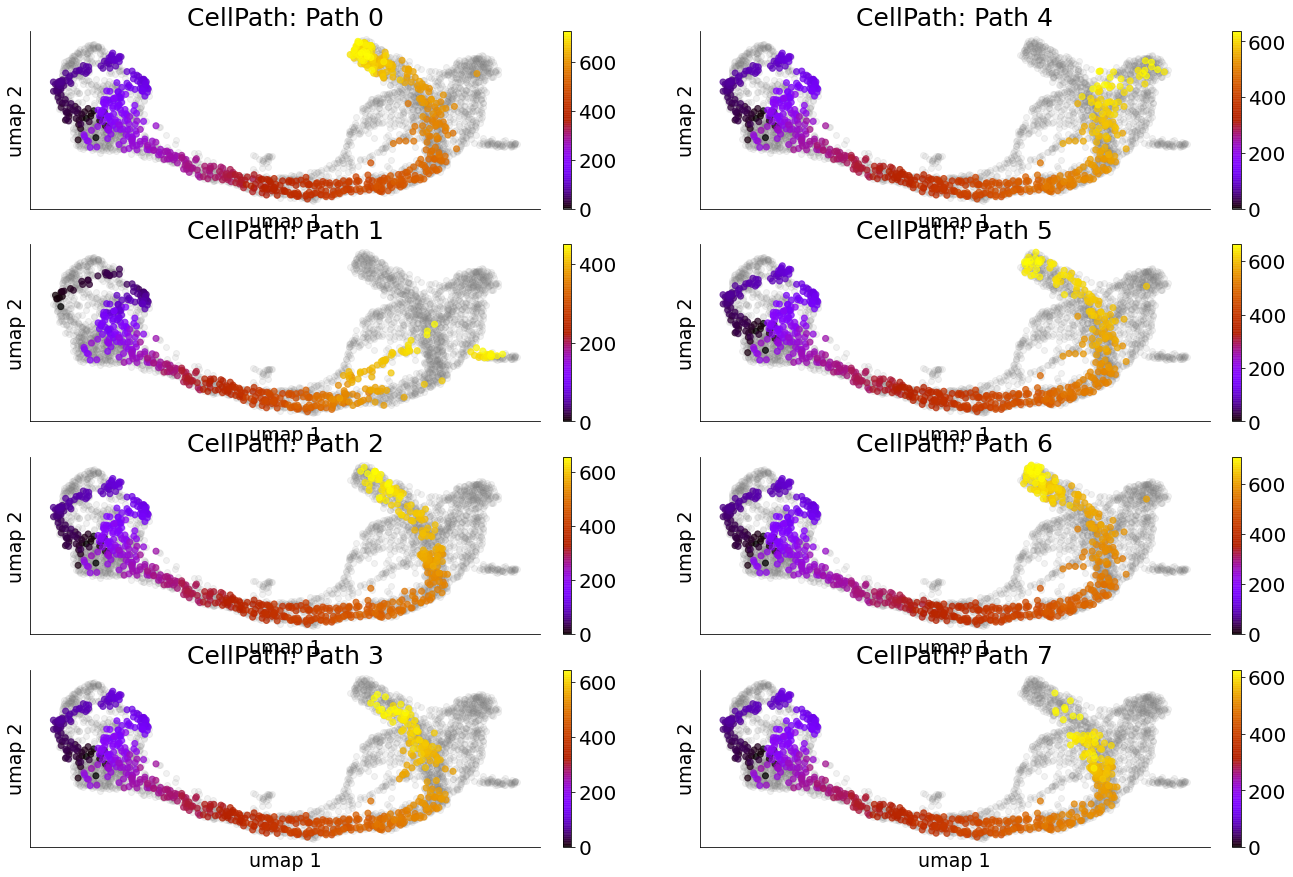

In [45]:
visual.first_order_approx_pt(cellpath_obj, basis="umap", trajs = 8, figsize = (22,15), save_as = None)

# Differentially expressed genes

In [45]:
de_genes = de.de_analy(cellpath_obj, p_val_t = 0.05, verbose = False)

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [26]:
importlib.reload(de)

<module 'cellpath.de_analy' from '../cellpath/de_analy.py'>

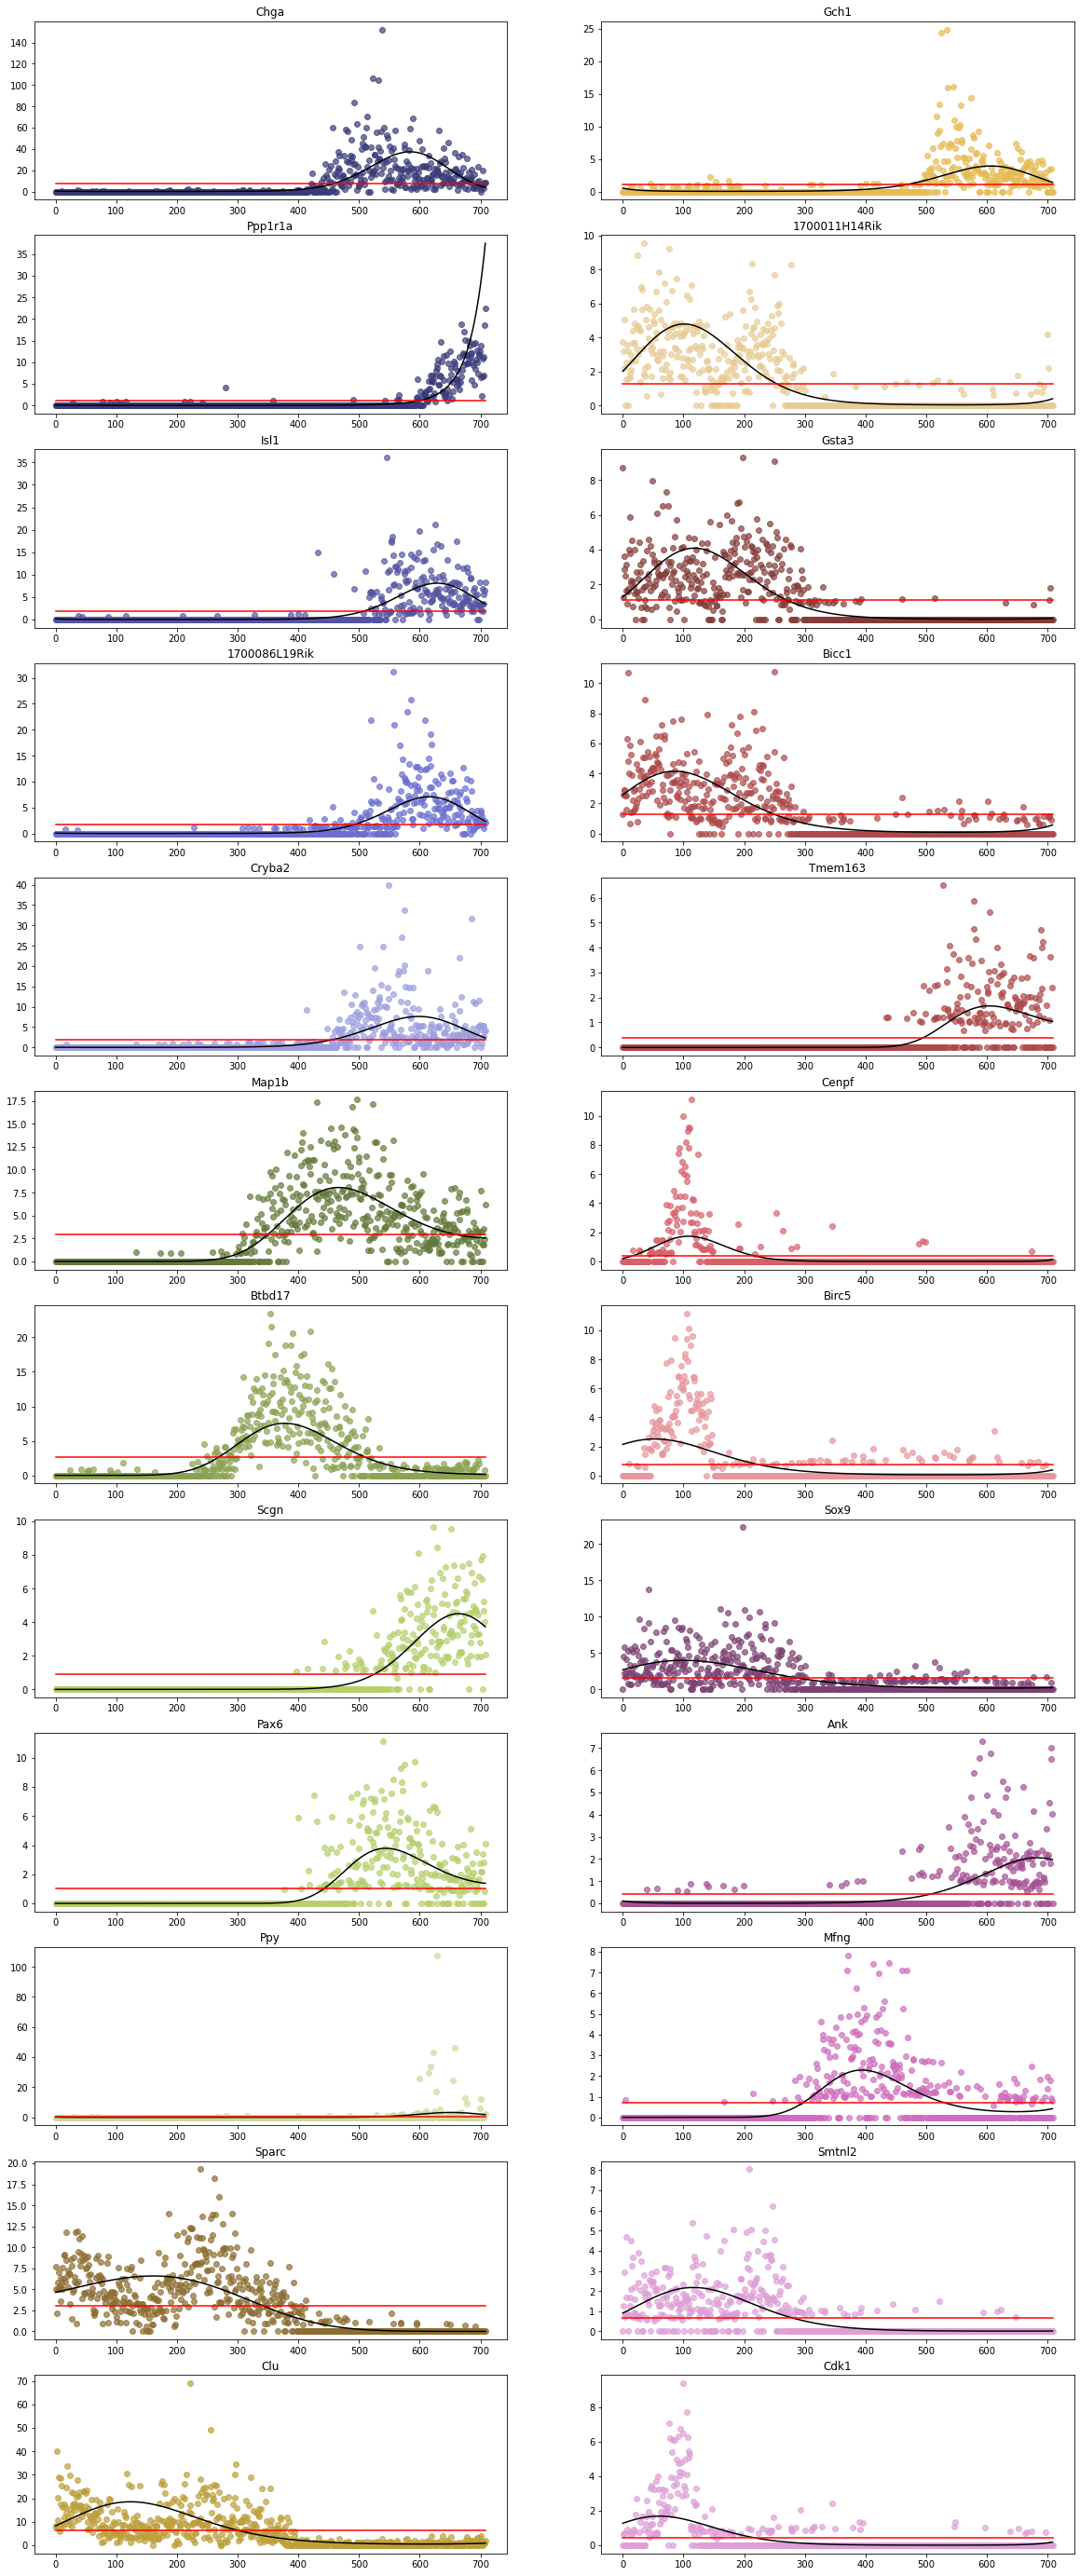

In [28]:
de.de_plot(cellpath_obj, {"traj_0": de_genes["traj_0"]}, figsize = (20,50), n_genes = 24, save_path = None)

In [46]:
pseudo_order = cellpath_obj.pseudo_order
for reconst_i in de_genes.keys():
    # get de gene
    de_gene = [x["gene"] for x in de_genes[reconst_i]]
    with open(reconst_i + "_de.txt", "w") as fp:
        for gene in de_gene:
            fp.write(gene + "\n")

    # get background gene
    sorted_pt = pseudo_order[reconst_i].dropna(axis = 0).sort_values()
    ordering = sorted_pt.index.values.squeeze()

    # spliced stores the count before log transform, but after library size normalization. 
    adata_sub = cellpath_obj.adata[ordering,:]
    background = [x for x in adata_sub.var.index.values]
    # add in de genes
    background = list(set(background).union(set(de_gene)))
    with open(reconst_i + "_background.txt", "w") as fp:
        for gene in background:
            fp.write(gene + "\n")
    
    print("length of de: " + str(len(de_gene)) + ", length of background: " + str(len(background)))

length of de: 205, length of background: 1309
length of de: 921, length of background: 1309
length of de: 1038, length of background: 1309
length of de: 1046, length of background: 1309
length of de: 1018, length of background: 1309
length of de: 1046, length of background: 1309
length of de: 1008, length of background: 1309
length of de: 709, length of background: 1309
length of de: 1013, length of background: 1309
length of de: 1060, length of background: 1309
length of de: 937, length of background: 1309
length of de: 1047, length of background: 1309
length of de: 960, length of background: 1309
length of de: 997, length of background: 1309
length of de: 922, length of background: 1309


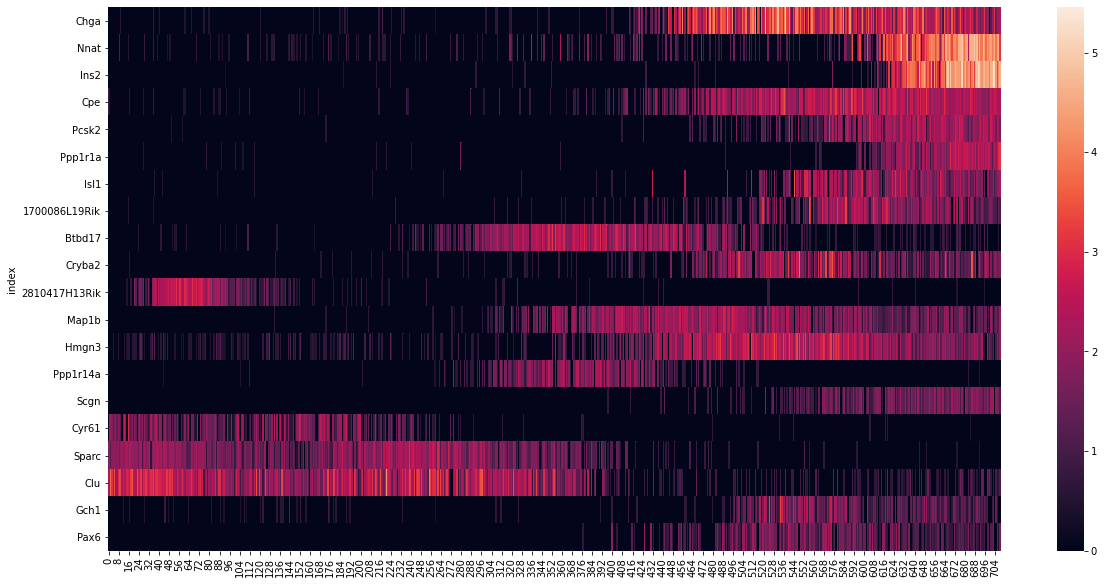

In [15]:
de.de_heatmap(cellpath_obj, {"traj_0": de_genes["traj_0"]}, figsize=(20,10), n_genes= 20, save_path = None)

## Directed PAGA

adata = anndata.read_h5ad("../real_data/pe/pe_clust.h5ad")
scv.tl.velocity_graph(adata)
scv.tl.paga(adata, groups='clusters')

scv.pl.paga(adata, basis='umap', size=30, alpha=.5, min_edge_width=2, node_size_scale=1.5, palette = "tab10", figsize=(10,7), save = "PAGA_old.png")